['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '5' '5' '5' '5'
 '5' '5' '5' '5' '5' '5' '6' '6' '6' '6' '6' '6' '6' '6' '6' '6' '7' '7'
 '7' '7' '7' '7' '7' '7' '7' '7' '8' '8' '8' '8' '8' '8' '8' '8' '8' '8'
 'Alex' 'Alex' 'Alex' 'Alex' 'Alex' 'Alex' 'Alex' 'Alex' 'Alex' 'Alex'
 'Anh' 'Anh' 'Anh' 'Anh' 'Anh' 'Anh' 'Anh' 'Anh' 'Anh' 'Anh' 'ChengTaoHui'
 'ChengTaoHui' 'ChengTaoHui' 'ChengTaoHui' 'ChengTaoHui' 'ChengTaoHui'
 'ChengTaoHui' 'ChengTaoHui' 'ChengTaoHui' 'ChengTaoHui' 'ChinShan'
 'ChinShan' 'ChinShan' 'ChinShan' 'ChinShan' 'ChinShan' 'ChinShan'
 'ChinShan' 'ChinShan' 'ChinShan' 'Fengzhen' 'Fengzhen' 'Fengzhen'
 'Fengzhen' 'Fengzhen' 'Fengzhen' 'Fengzhen' 'Fengzhen' 'Fengzhen'
 'Fengzhen' 'Fuhanqi' 'Fuhanqi' 'Fuhanqi' 'Fuhanqi' 'Fuhanqi' 'Fuhanqi'
 'Fuhanqi' 'Fuhanqi' 'Fuhanqi' 'Fuhanqi' 'FuJiangying' 'FuJiangying'
 'FuJian

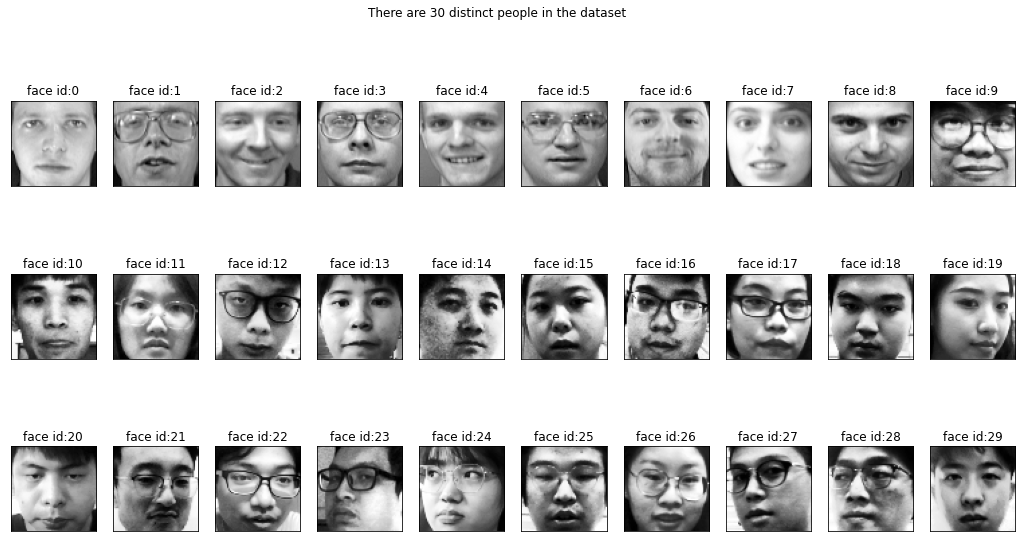

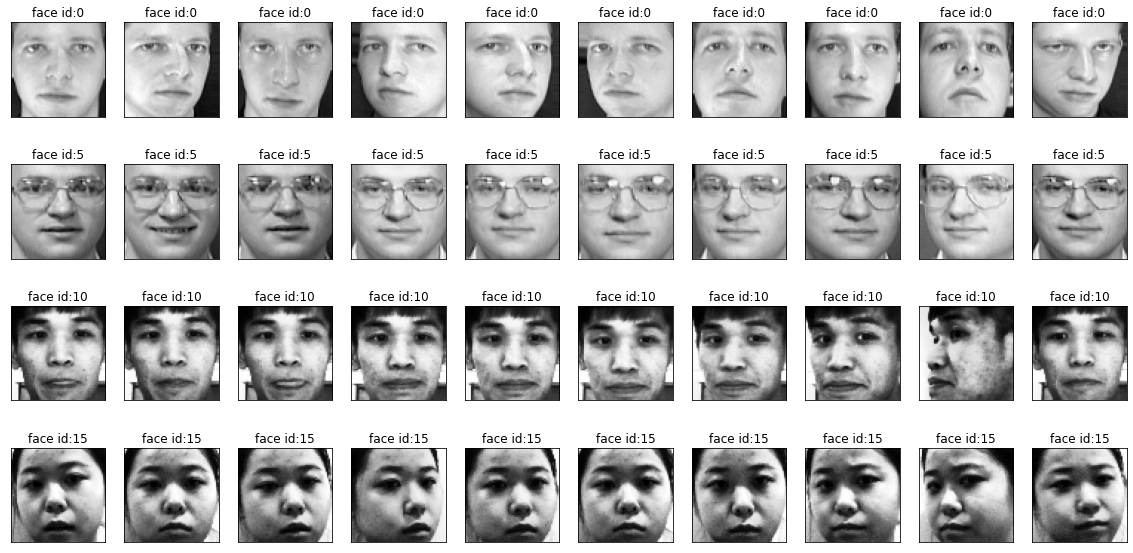

X shape: (300, 4096)
X_train shape: (210, 4096)
y_train shape:(210,)


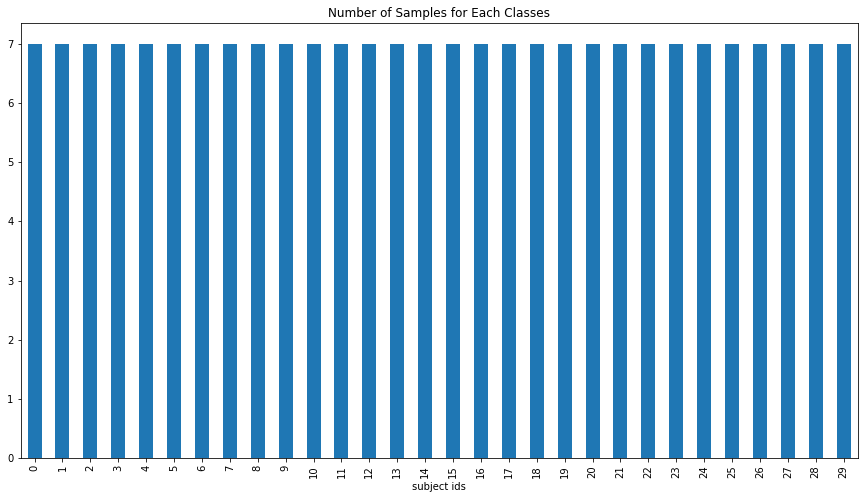

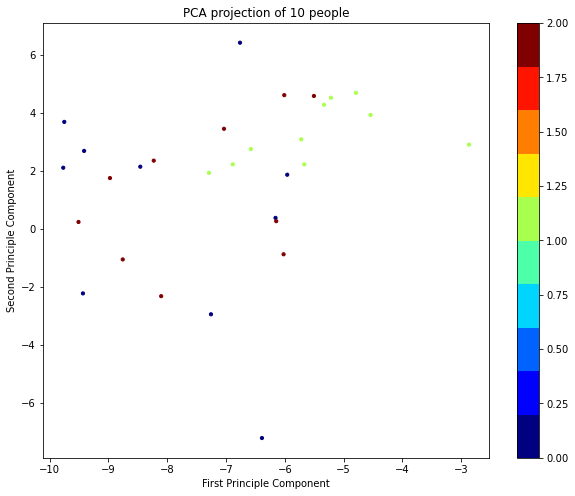

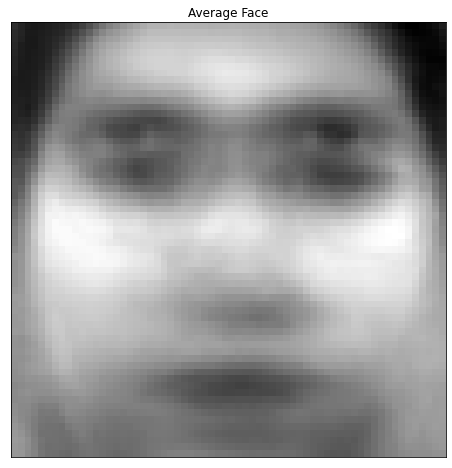

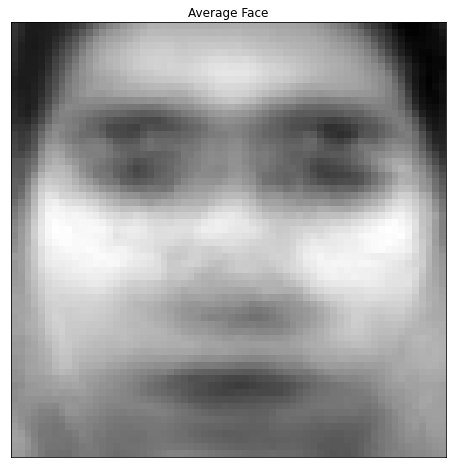

num of eigenfaces: 30


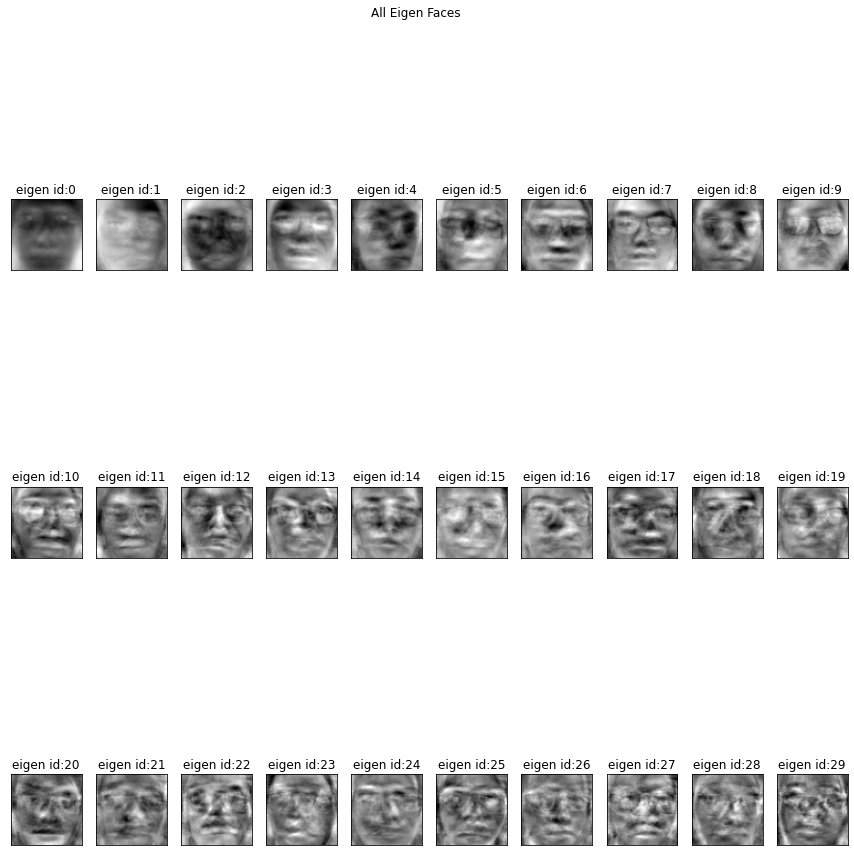

No of components in PCA:  2
accuracy score:0.4667
No of components in PCA:  4
accuracy score:0.7556
No of components in PCA:  6
accuracy score:0.8333
No of components in PCA:  8
accuracy score:0.8778
No of components in PCA:  10
accuracy score:0.8667
No of components in PCA:  12
accuracy score:0.8444
No of components in PCA:  14
accuracy score:0.8444
No of components in PCA:  16
accuracy score:0.8667
No of components in PCA:  18
accuracy score:0.9000
No of components in PCA:  20
accuracy score:0.9000
No of components in PCA:  22
accuracy score:0.9000
No of components in PCA:  24
accuracy score:0.9111
No of components in PCA:  26
accuracy score:0.9000
No of components in PCA:  28
accuracy score:0.9000
No of components in PCA:  30
accuracy score:0.9000
No of components in PCA:  32
accuracy score:0.8889
No of components in PCA:  34
accuracy score:0.9000
No of components in PCA:  36
accuracy score:0.9333
No of components in PCA:  38
accuracy score:0.9333
No of components in PCA:  40
accura

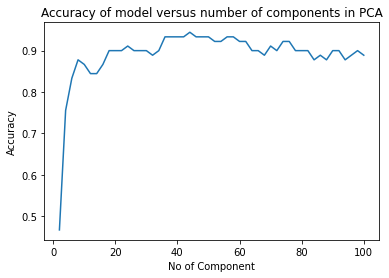

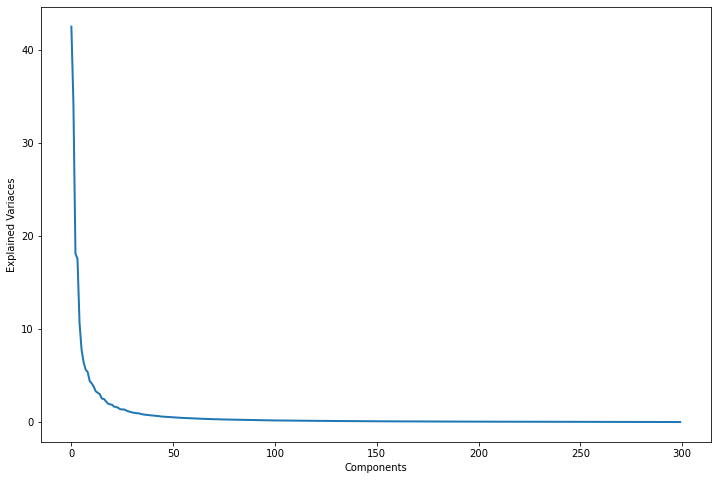

Training PCA with 52 components...
No of components in PCA:  52
accuracy score:0.9222


In [ ]:
import cv2 as cv
import numpy as np
import argparse
from scipy.special import softmax
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
#Visualization
import matplotlib.pyplot as plt
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# from sklearn.decomposition import SparsePCA as PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.datasets import fetch_olivetti_faces
import warnings

def preprocessing(img, border=2):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # remove some border
    img = cv2.resize(img, (200, 200))
    height, width = img.shape[:2]
    img = img[border:height - border, border:width - border]
    img = cv2.resize(img, (64, 64))
    # Histogram Equalization
    img = cv2.equalizeHist(img)
    img = cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
    img = img / 255.
    return img

# <editor-fold desc="visualization functions">
def show_distinct_people(images, unique_ids):
    # Creating 4X10 subplots in  18x9 figure size
    fig, axarr = plt.subplots(nrows=3, ncols=10, figsize=(18, 9))
    # For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr = axarr.flatten()
    # print(images.shape)

    # iterating over user ids
    for unique_id in unique_ids:
        image_index = unique_id * 10
        # print(image_index)
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 30 distinct people in the dataset")
    plt.show()
def show_10_faces_of_n_subject(images, subject_ids):
    cols = 10  # each subject has 3 distinct face images
    # rows=(len(subject_ids)*10)/cols #
    rows = len(subject_ids)
    rows = int(rows)

    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
    # axarr=axarr.flatten()

    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index = subject_id * 10 + j
            axarr[i, j].imshow(images[image_index], cmap="gray")
            axarr[i, j].set_xticks([])
            axarr[i, j].set_yticks([])
            axarr[i, j].set_title("face id:{}".format(subject_id))
    plt.show()
# </editor-fold>

# <editor-fold desc="pca prediction functions">
def getPCAResultSingleImage(image):
    image = preprocessing(image, 20)
    X = pca.transform(image.reshape((1, image.shape[0] * image.shape[1])))
    #print("X: ",X)
    #print("Pred: ", clf.predict(X))
    #input("pause..")
    prob = clf.predict_proba(X)
    y_pred = int(np.squeeze(clf.predict(X)))
    max_prob = np.squeeze(prob)[y_pred]
    return str(y_pred) + "  " + str(max_prob)

def getPCAResults(detected_faces):
    list_results = []
    for face in detected_faces:
        list_results.append(getPCAResultSingleImage(face))
    return list_results


# </editor-fold>

# <editor-fold desc="detector functions">

def drawRect(img, x, y, w, h, color=(0, 255, 0), thickness=1):
    cv.rectangle(img, (x, y), (x + w, y + h), color, thickness)


def ifExistTrueNose(coord_list):
    lowest_bottom_of_eye = 0
    nose_status_list = []
    for (faces, eyes, nose) in coord_list:
        flag = False
        for (x2, y2, w2, h2) in eyes:
            if (y2 + w2) > lowest_bottom_of_eye:
                lowest_bottom_of_eye = y2 + w2
        for (x3, y3, w3, h3) in nose:
            if (y3 + w3) > lowest_bottom_of_eye > 0:
                # if there exists a "nose" s.t. it is lower than the lowest eye
                flag = True
                #print("bottom of eye: {}, bottom of nose: {}, flag: {}", lowest_bottom_of_eye, y3 + w3, flag)
        nose_status_list.append(flag)
    return nose_status_list


def getDetectedFaces(frame, coord_list):
    face_list = []
    for (face, eyes, nose) in coord_list:
        (x, y, w, h) = face
        face_list.append(frame[y:y + h, x:x + w])
    return face_list


def drawDetectionResults(frame, coord_list):
    for (face, eyes, nose) in coord_list:
        (x, y, w, h) = face
        drawRect(frame, x, y, w, h)
        for (x2, y2, w2, h2) in eyes:
            drawRect(frame, x + x2, y + y2, w2, h2, (0, 0, 255))
        for (x3, y3, w3, h3) in nose:
            drawRect(frame, x + x3, y + y3, w3, h3, (255, 0, 0))


def getMaskStatus(frame, coord_list):
    list_mask_status = []
    for (face, eyes, nose) in coord_list:
        (x, y, w, h) = face
        # print(face, ',', eyes, ',', nose)
        drawRect(frame, x, y, w, h)
        if len(eyes) > 0 and len(nose) > 0:  # no mask
            list_mask_status.append(False)
        elif len(eyes) > 0 and len(nose) == 0:  # mask
            list_mask_status.append(True)
    return list_mask_status


def putMaskStatus(frame, coord_list, list_mask_status):
    for ((face, eyes, nose), status) in zip(coord_list, list_mask_status):
        (x, y, w, h) = face
        # print(face, ',', eyes, ',', nose)
        if status == False:  # no mask
            cv.putText(frame, "No Mask", (x - 10, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 255))
        else:  # mask
            cv.putText(frame, "Mask", (x - 10, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 255))

def putIdentity(frame, coord_list, list_identity):
    for ((face, eyes, nose), id) in zip(coord_list, list_identity):
        (x, y, w, h) = face
        #print(id)
        #print(face)
        # print(face, ',', eyes, ',', nose)
        index = id[:2]
        print(index)
        score = id[2:]
        index_10 = int(index) * 10
        final_label = target_label[index_10]
        print(final_label)
        final_str = str(final_label) + '    ' + str(score)
        cv.putText(frame, str(final_str), (x, y + 30), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255))

def detectFace(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    # -- Detect faces
    # faces = face_cascade.detectMultiScale(frame_gray)
    faces = face_cascade.detectMultiScale(frame_gray, minNeighbors=5)
    face_coord_list = []
    for face in faces:
        (x, y, w, h) = face
        faceROI = frame_gray[y:y + h, x:x + w]
        # drawRect(frame, x, y, w, h)
        # -- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI, minNeighbors=3)
        nose = nose_cascade.detectMultiScale(faceROI, minNeighbors=15)
        # eyes = eyes_cascade.detectMultiScale(faceROI)
        # nose = nose_cascade.detectMultiScale(faceROI)
        # for (x2,y2,w2,h2) in eyes:
        #     drawRect(frame, x+x2,y+y2,w2,h2,(0,0,255))
        # for (x3,y3,w3,h3) in nose:
        #     drawRect(frame, x+x3,y+y3,w3,h3,(255,0,0))
        face_coord_list.append((face, eyes, nose))
    # print(face_coord_list)
    # print(len(face_coord_list[0]))
    return frame, face_coord_list
    # cv.imshow('Capture - Face detection', frame)


def detectFaceDNN(frame):
    face_coord_list = []
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    height, width = frame.shape[:2]
    # -- Detect faces
    # faces = face_cascade.detectMultiScale(frame_gray)
    blob = cv.dnn.blobFromImage(frame, 1.0, (300, 300), [104, 117, 123], False, False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (x, y, x1, y1) = box.astype("int")
            w = x1 - x
            h = y1 - y

            delta = int(abs(w - h))
            if (w > h):
                y = int(y - delta / 2)
                y1 = int(y1 + delta / 2)
            else:
                x = int(x - delta / 2)
                x1 = int(x1 + delta / 2)

            face = (x, y, w, h) = (x, y, x1 - x, y1 - y)
            faceROI = frame_gray[max(y,0):min(height,y + h), max(x,0):min(width,x + w)]
            # drawRect(frame, x, y, w, h)
            # -- In each face, detect eyes
            eyes = eyes_cascade.detectMultiScale(faceROI, minNeighbors=3)
            nose = nose_cascade.detectMultiScale(faceROI, minNeighbors=15)
            # eyes = eyes_cascade.detectMultiScale(faceROI)
            # nose = nose_cascade.detectMultiScale(faceROI)
            # for (x2,y2,w2,h2) in eyes:
            #     drawRect(frame, x+x2,y+y2,w2,h2,(0,0,255))
            # for (x3,y3,w3,h3) in nose:
            #     drawRect(frame, x+x3,y+y3,w3,h3,(255,0,0))
            face_coord_list.append((face, eyes, nose))

    return frame, face_coord_list
    # cv.imshow('Capture - Face detection', frame)

# </editor-fold">

# <editor-fold desc="config">
# our own collected data
ntudataset_path = './MainDataset'

# how many subject from olive dataset? how many image per subject?
olive_subject_total = 9
olive_photo_per_subject = 10

# Haar Cascade Paths
face_cascade_name = './models/haarcascade_frontalface_alt.xml'
eyes_cascade_name = './models/haarcascade_eye_tree_eyeglasses.xml'
nose_cascade_name = './models/haarcascade_mcs_nose.xml'
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()
nose_cascade = cv.CascadeClassifier()

# DNN face detector model path
modelFile = "models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "models/deploy.prototxt.txt"
net = cv.dnn.readNetFromCaffe(configFile, modelFile)
# </editor-fold>

# <editor-fold desc="pca training">

# ignore nasty warnings
warnings.filterwarnings('ignore')

# fetch olivetti dataset for more faces
olive_data = fetch_olivetti_faces()['images'][0:olive_subject_total*10]
olive_target = fetch_olivetti_faces()['target'][:olive_subject_total*10]

# select from olive dataset according to config
selected_olivedata = []
selected_olivetarget = []
for k in range(0, olive_subject_total):
    used_imgae_startindex = 10 * k
    used_image_endindex = 10 * (k + 1)
    single_person_selected_olive_data = olive_data[used_imgae_startindex:used_image_endindex]
    single_person_selected_olive_target = olive_target[used_imgae_startindex:used_image_endindex]
    single_person_selected_olive_data = single_person_selected_olive_data[:olive_photo_per_subject]
    single_person_selected_olive_target = single_person_selected_olive_target[:olive_photo_per_subject]
    selected_olivedata.append(single_person_selected_olive_data)
    selected_olivetarget.append(single_person_selected_olive_target)

selected_olivedata = np.asarray(selected_olivedata).reshape(-1, 64, 64)
selected_olivetarget = np.asarray(selected_olivetarget).reshape(-1)


# read our own dataset
ntudataset = os.listdir(ntudataset_path)
noexpression_list = list()

# allocate id to subjects in our dataset
ntu_subject_id = olive_subject_total
# target list
ntudataset_target = []
ntudataset_label = []
# read data
for subject in ntudataset:
    subject_path = ntudataset_path + '/' + subject
    no_exp_face_img_filenames = os.listdir(subject_path)[:10]
    for imgfile in no_exp_face_img_filenames:
        img = cv2.imread(subject_path + '/' + imgfile)
        img = preprocessing(img, 20)
        noexpression_list.append(img)
        ntudataset_target.append(ntu_subject_id)
        ntudataset_label.append(subject)
    ntu_subject_id = ntu_subject_id + 1
data = np.concatenate((selected_olivedata, np.asarray(noexpression_list)), axis=0)


target = np.concatenate((selected_olivetarget, np.asarray(ntudataset_target)), axis=0)
target_label = np.concatenate((selected_olivetarget, np.asarray(ntudataset_label)), axis=0)
print(target_label)
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1], data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0, :4]))
print("unique target number:", np.unique(target))
input("Press enter to start visualization and training...")

# visualize dataset
show_distinct_people(data, np.unique(target))

# You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0, 5, 10, 15])

# flatten as input for PCA model
X = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print("X shape:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:{}".format(y_train.shape))

y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15, 8), title="Number of Samples for Each Classes")

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# plot 10 ppl pca
number_of_people = 10
index_range = number_of_people * 3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(X_pca[:index_range, 0],
                     X_pca[:index_range, 1],
                     c=target[:index_range],
                     s=10,
                     cmap=plt.get_cmap('jet', number_of_people)
                     )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))
fig.colorbar(scatter)
plt.show()

# show avg face
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')
plt.show()

n_components = 30
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')
plt.show()

# show eigenface
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

print("num of eigenfaces:", number_of_eigenfaces)
cols = 10
rows = int(number_of_eigenfaces / cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10 * "=", 10 * "="))
plt.show()

no_components = []
accuracy_score = []
for n in range (2,102,2):
    n_components = n
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train)
    
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf = SVC()
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    
    print("No of components in PCA: ", n_components)
    no_components.append(n_components)
    print("accuracy score:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

plt.plot(no_components, accuracy_score)
plt.xlabel('No of Component')
plt.ylabel('Accuracy')
plt.title('Accuracy of model versus number of components in PCA')
plt.show()

pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

#Final selection of number of components
n_components = 52
print("Training PCA with {} components...".format(n_components))
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = SVC(probability=True)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("No of components in PCA: ", n_components)
print("accuracy score:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
input("Press enter to start real-time recognition...")
# </editor-fold">

# <editor-fold desc="real-time recognition">

# -- 1. Load the cascades
if not face_cascade.load(face_cascade_name):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(eyes_cascade_name):
    print('--(!)Error loading eyes cascade')
    exit(0)
if not nose_cascade.load(nose_cascade_name):
    print('--(!)Error loading nose cascade')
    exit(0)
camera_device = 0

# -- 2. Read the video stream
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    # detect face, eyes and nose
    frame, coords = detectFaceDNN(frame)
    # display detected faces
    detected_faces = getDetectedFaces(frame, coords)
    # draw rectangles
    drawDetectionResults(frame, coords)
    # get mask status for all detected faces
    # list_mask_status = [(x and y) for (x, y) in
    #                     zip(getMaskStatus(frame, coords), [not elem for elem in ifExistTrueNose(coords)])]
    list_mask_status = [not elem for elem in ifExistTrueNose(coords)]
    
    # put mask status onto frame
    putMaskStatus(frame, coords, list_mask_status)

    # get recognition results
    ids = getPCAResults(detected_faces)

    # put on frame
    putIdentity(frame, coords, ids)

    cv.imshow("frame", frame)
    # avoid fake nose at eyebrow
    # print()
    if cv.waitKey(10) == 27:
        break


# </editor-fold>

There are 220 images in the dataset
There are 22 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.36776859 0.41735536 0.44214877]
unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Press enter to start visualization and training...


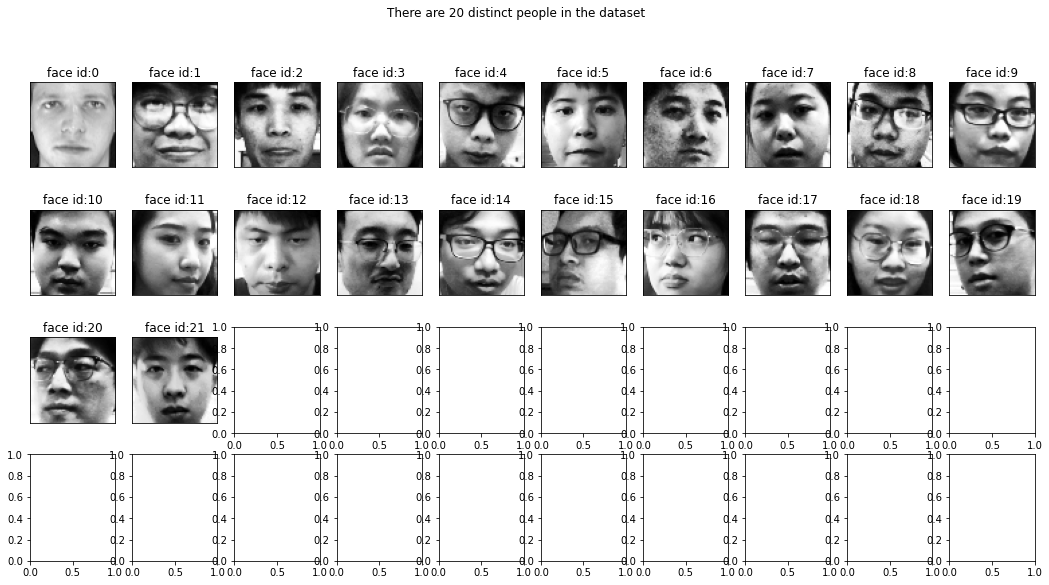

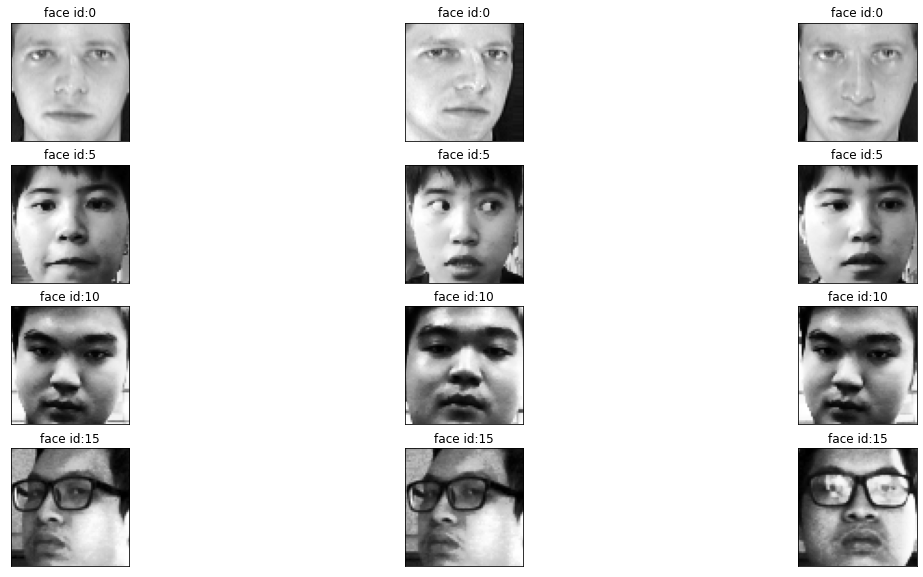

X shape: (220, 4096)
X_train shape: (154, 4096)
y_train shape:(154,)


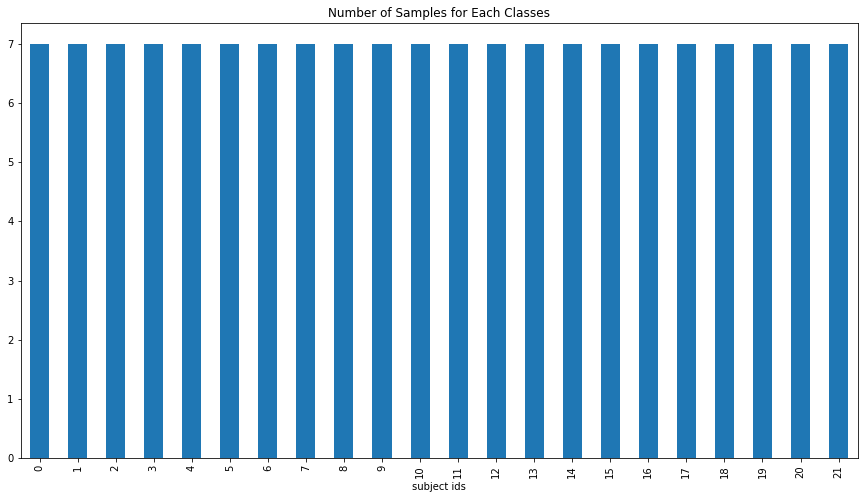

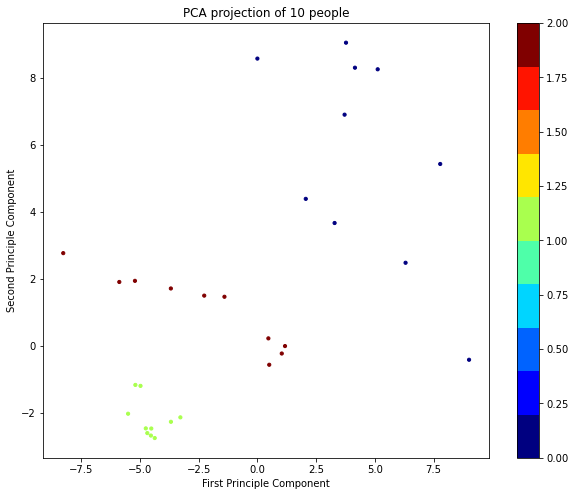

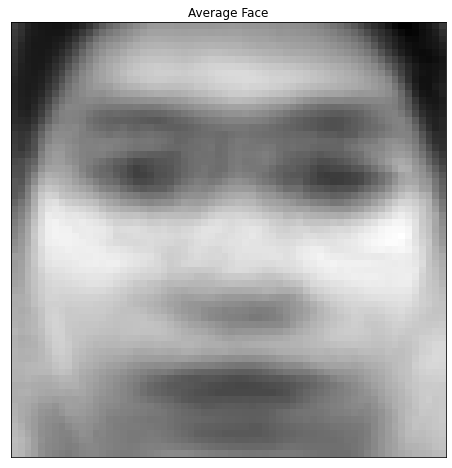

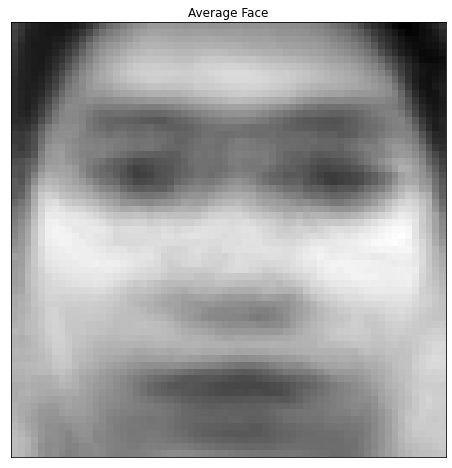

num of eigenfaces: 30


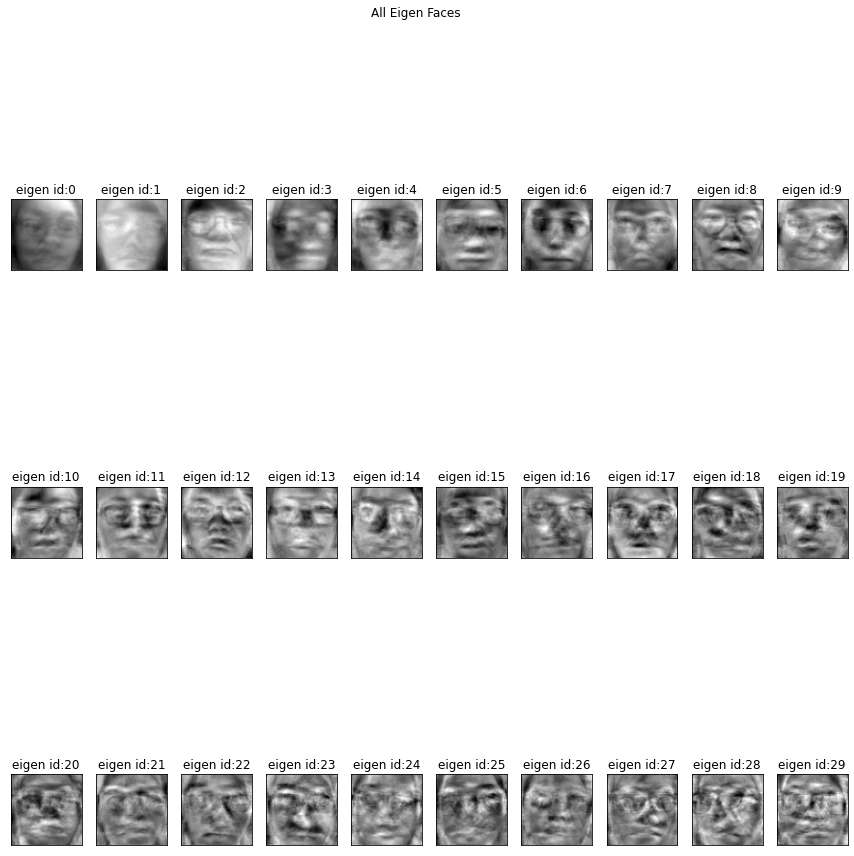

Training whole face PCA with 60 components...
No of components in whole face PCA:  60
accuracy score:0.9697
Training whole face PCA with 60 components...
No of components in half-face PCA:  60
accuracy score:0.9242
Press enter to start real-time recognition...


In [ ]:
import cv2 as cv
import numpy as np
import argparse
from scipy.special import softmax
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
#Visualization
import matplotlib.pyplot as plt
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# from sklearn.decomposition import SparsePCA as PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.datasets import fetch_olivetti_faces
import warnings

# <editor-fold desc="config">

# full image after preprocessing is 64.
# define the height to use for mask case
mask_total_height = 25

# handle unseen face?
handle_unseen_face=True
global_thresh_unseen = 0.1
global_thresh_unseen_mask = 0.07

# skip obtaining classification acc vs n_comp
force_override_n = True
force_n = 60 # n_comp value

# path to our own collected data
ntudataset_path = './MainDataset'

# how many subject from olive dataset? how many image per subject?
olive_subject_total = 1
olive_photo_per_subject = 10

# Haar Cascade Paths
face_cascade_name = 'models/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'models/haarcascade_eye_tree_eyeglasses.xml'
nose_cascade_name = 'models/haarcascade_mcs_nose.xml'
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()
nose_cascade = cv.CascadeClassifier()

# DNN face detector model path
modelFile = "models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "models/deploy.prototxt.txt"
net = cv.dnn.readNetFromCaffe(configFile, modelFile)
# </editor-fold>

def preprocessing(img, border=2):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # remove some border
    img = cv2.resize(img, (200, 200))
    height, width = img.shape[:2]
    img = img[border:height - border, border:width - border]
    img = cv2.resize(img, (64, 64))
    # Histogram Equalization
    img = cv2.equalizeHist(img)
    img = cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
    img = img / 255.
    return img

# <editor-fold desc="visualization functions">
def show_distinct_people(images, unique_ids):
    # Creating 4X10 subplots in  18x9 figure size
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    # For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr = axarr.flatten()
    # print(images.shape)

    # iterating over user ids
    for unique_id in unique_ids:
        image_index = unique_id * 10
        # print(image_index)
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 20 distinct people in the dataset")
    plt.show()
def show_3_faces_of_n_subject(images, subject_ids):
    cols = 3  # each subject has 3 distinct face images
    # rows=(len(subject_ids)*10)/cols #
    rows = len(subject_ids)
    rows = int(rows)

    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
    # axarr=axarr.flatten()

    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index = subject_id * 10 + j
            axarr[i, j].imshow(images[image_index], cmap="gray")
            axarr[i, j].set_xticks([])
            axarr[i, j].set_yticks([])
            axarr[i, j].set_title("face id:{}".format(subject_id))
    plt.show()
# </editor-fold>

# <editor-fold desc="pca prediction functions">
def getPCAResultSingleImage(image):
    image = preprocessing(image, 20)
    X = pca.transform(image.reshape((1, image.shape[0] * image.shape[1])))
    #print("X: ",X)
    #print("Pred: ", clf.predict(X))
    #input("pause..")
    prob = clf.predict_proba(X)
    y_pred = int(np.squeeze(clf.predict(X)))
    #print(ntu_subject_id_label_dict)
    #print(y_pred)
    max_prob = np.squeeze(prob)[y_pred]
    if max_prob< global_thresh_unseen and handle_unseen_face==True:
        return "Unseen Face!!"
    try:
        pred_name = ntu_subject_id_label_dict[y_pred]
    except:
        pred_name = str(y_pred)
    return str(pred_name) + "  " + str("{:.4f}".format(max_prob))

def getPCAResultSingleImagewMask(image):
    image = preprocessing(image, 20)
    image = image[:mask_total_height,:] # 64*64 upperhalf face
    X = pca_upperhalf.transform(image.reshape((1, image.shape[0] * image.shape[1])))
    #print("X: ",X)
    #print("Pred: ", clf.predict(X))
    #input("pause..")
    prob = clf_upperface.predict_proba(X)
    y_pred = int(np.squeeze(clf_upperface.predict(X)))
    max_prob = np.squeeze(prob)[y_pred]

    #print(ntu_subject_id_label_dict)
    #print(y_pred)
    if max_prob< global_thresh_unseen_mask and handle_unseen_face==True:
        return "Unseen Face!!"
    try:
        pred_name = ntu_subject_id_label_dict[y_pred]
    except:
        pred_name = str(y_pred)
    return str(pred_name) + " mask  " + str("{:.4f}".format(max_prob))

def getPCAResults(detected_faces):
    list_results = []
    for face in detected_faces:
        list_results.append(getPCAResultSingleImage(face))
    return list_results

def getPCAResultswMask(detected_faces, mask_status_list):
    list_results = []
    for (face, mask_status) in zip(detected_faces, mask_status_list):
        if mask_status == True:
            list_results.append(getPCAResultSingleImagewMask(face))
        elif mask_status==False:
            list_results.append(getPCAResultSingleImage(face))
    return list_results

# </editor-fold>

# <editor-fold desc="detector functions">

def drawRect(img, x, y, w, h, color=(0, 255, 0), thickness=1):
    cv.rectangle(img, (x, y), (x + w, y + h), color, thickness)


def ifExistTrueNose(coord_list):
    lowest_bottom_of_eye = 0
    nose_status_list = []
    for (faces, eyes, nose) in coord_list:
        flag = False
        for (x2, y2, w2, h2) in eyes:
            if (y2 + w2) > lowest_bottom_of_eye:
                lowest_bottom_of_eye = y2 + w2
        for (x3, y3, w3, h3) in nose:
            if (y3 + w3) > lowest_bottom_of_eye > 0:
                # if there exists a "nose" s.t. it is lower than the lowest eye
                flag = True
                #print("bottom of eye: {}, bottom of nose: {}, flag: {}", lowest_bottom_of_eye, y3 + w3, flag)
        nose_status_list.append(flag)
    return nose_status_list


def getDetectedFaces(frame, coord_list):
    face_list = []
    for (face, eyes, nose) in coord_list:
        (x, y, w, h) = face
        face_list.append(frame[y:y + h, x:x + w])
    return face_list

def drawDetectionResults(frame, coord_list):
    for (face, eyes, nose) in coord_list:
        (x, y, w, h) = face
        drawRect(frame, x, y, w, h)
        for (x2, y2, w2, h2) in eyes:
            drawRect(frame, x + x2, y + y2, w2, h2, (0, 0, 255))
        for (x3, y3, w3, h3) in nose:
            drawRect(frame, x + x3, y + y3, w3, h3, (255, 0, 0))


def getMaskStatus(frame, coord_list):
    list_mask_status = []
    for (face, eyes, nose) in coord_list:
        (x, y, w, h) = face
        # print(face, ',', eyes, ',', nose)
        drawRect(frame, x, y, w, h)
        if len(eyes) > 0 and len(nose) > 0:  # no mask
            list_mask_status.append(False)
        elif len(eyes) > 0 and len(nose) == 0:  # mask
            list_mask_status.append(True)
    return list_mask_status


def putMaskStatus(frame, coord_list, list_mask_status):
    for ((face, eyes, nose), status) in zip(coord_list, list_mask_status):
        (x, y, w, h) = face
        # print(face, ',', eyes, ',', nose)
        if status == False:  # no mask
            cv.putText(frame, "No Mask", (x - 10, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 255))
        else:  # mask
            cv.putText(frame, "Mask", (x - 10, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 255))

def putIdentity(frame, coord_list, list_identity):
    for ((face, eyes, nose), id) in zip(coord_list, list_identity):
        (x, y, w, h) = face
        #print(id)
        #print(face)
        # print(face, ',', eyes, ',', nose)
        cv.putText(frame, str(id), (x, y + 30), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255))

def detectFace(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    # -- Detect faces
    # faces = face_cascade.detectMultiScale(frame_gray)
    faces = face_cascade.detectMultiScale(frame_gray, minNeighbors=5)
    face_coord_list = []
    for face in faces:
        (x, y, w, h) = face
        faceROI = frame_gray[y:y + h, x:x + w]
        # drawRect(frame, x, y, w, h)
        # -- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI, minNeighbors=3)
        nose = nose_cascade.detectMultiScale(faceROI, minNeighbors=15)
        # eyes = eyes_cascade.detectMultiScale(faceROI)
        # nose = nose_cascade.detectMultiScale(faceROI)
        # for (x2,y2,w2,h2) in eyes:
        #     drawRect(frame, x+x2,y+y2,w2,h2,(0,0,255))
        # for (x3,y3,w3,h3) in nose:
        #     drawRect(frame, x+x3,y+y3,w3,h3,(255,0,0))
        face_coord_list.append((face, eyes, nose))
    # print(face_coord_list)
    # print(len(face_coord_list[0]))
    return frame, face_coord_list
    # cv.imshow('Capture - Face detection', frame)


def detectFaceDNN(frame):
    face_coord_list = []
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    height, width = frame.shape[:2]
    # -- Detect faces
    # faces = face_cascade.detectMultiScale(frame_gray)
    blob = cv.dnn.blobFromImage(frame, 1.0, (300, 300), [104, 117, 123], False, False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (x, y, x1, y1) = box.astype("int")
            w = x1 - x
            h = y1 - y

            delta = int(abs(w - h))
            if (w > h):
                y = int(y - delta / 2)
                y1 = int(y1 + delta / 2)
            else:
                x = int(x - delta / 2)
                x1 = int(x1 + delta / 2)

            face = (x, y, w, h) = (x, y, x1 - x, y1 - y)
            faceROI = frame_gray[max(y,0):min(height,y + h), max(x,0):min(width,x + w)]
            # drawRect(frame, x, y, w, h)
            # -- In each face, detect eyes
            eyes = eyes_cascade.detectMultiScale(faceROI, minNeighbors=3)
            nose = nose_cascade.detectMultiScale(faceROI, minNeighbors=15)
            # eyes = eyes_cascade.detectMultiScale(faceROI)
            # nose = nose_cascade.detectMultiScale(faceROI)
            # for (x2,y2,w2,h2) in eyes:
            #     drawRect(frame, x+x2,y+y2,w2,h2,(0,0,255))
            # for (x3,y3,w3,h3) in nose:
            #     drawRect(frame, x+x3,y+y3,w3,h3,(255,0,0))
            face_coord_list.append((face, eyes, nose))

    return frame, face_coord_list
    # cv.imshow('Capture - Face detection', frame)

# </editor-fold">

# <editor-fold desc="pca training">

# ignore nasty warnings
warnings.filterwarnings('ignore')

# fetch olivetti dataset for more faces
olive_data = fetch_olivetti_faces()['images'][0:olive_subject_total*10]
olive_target = fetch_olivetti_faces()['target'][:olive_subject_total*10]

# select from olive dataset according to config
selected_olivedata = []
selected_olivetarget = []
for k in range(0, olive_subject_total):
    used_imgae_startindex = 10 * k
    used_image_endindex = 10 * (k + 1)
    single_person_selected_olive_data = olive_data[used_imgae_startindex:used_image_endindex]
    single_person_selected_olive_target = olive_target[used_imgae_startindex:used_image_endindex]
    single_person_selected_olive_data = single_person_selected_olive_data[:olive_photo_per_subject]
    single_person_selected_olive_target = single_person_selected_olive_target[:olive_photo_per_subject]
    selected_olivedata.append(single_person_selected_olive_data)
    selected_olivetarget.append(single_person_selected_olive_target)

selected_olivedata = np.asarray(selected_olivedata).reshape(-1, 64, 64)
selected_olivetarget = np.asarray(selected_olivetarget).reshape(-1)


# read our own dataset
ntudataset = os.listdir(ntudataset_path)
noexpression_list = list()

# allocate id to subjects in our dataset
ntu_subject_id = olive_subject_total
ntu_subject_id_label_dict = {}
# target list
ntudataset_target = []
# read data
for subject in ntudataset:
    subject_path = ntudataset_path + '/' + subject
    no_exp_face_img_filenames = os.listdir(subject_path)[:10]
    for imgfile in no_exp_face_img_filenames:
        img = cv2.imread(subject_path + '/' + imgfile)
        img = preprocessing(img, 20)
        noexpression_list.append(img)
        ntudataset_target.append(ntu_subject_id)
    ntu_subject_id_label_dict[ntu_subject_id] = subject
    ntu_subject_id = ntu_subject_id + 1


data = np.concatenate((selected_olivedata, np.asarray(noexpression_list)), axis=0)
target = np.concatenate((selected_olivetarget, np.asarray(ntudataset_target)), axis=0)

print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1], data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0, :4]))
print("unique target number:", np.unique(target))
input("Press enter to start visualization and training...")

# visualize dataset
show_distinct_people(data, np.unique(target))

# You can playaround subject_ids to see other people faces
show_3_faces_of_n_subject(images=data, subject_ids=[0, 5, 10, 15])

# flatten as input for PCA model
X = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
X_upperhalf = X[:, :int(mask_total_height*64)]

print("X shape:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target, random_state=123)
X_upperhalf_train, X_upperhalf_test, y_upperhalf_train, y_upperhalf_test = train_test_split(X_upperhalf, target, test_size=0.3, stratify=target, random_state=123)

print("X_train shape:", X_train.shape)
print("y_train shape:{}".format(y_train.shape))

y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15, 8), title="Number of Samples for Each Classes")

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# plot 10 ppl pca
number_of_people = 10
index_range = number_of_people * 3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(X_pca[:index_range, 0],
                     X_pca[:index_range, 1],
                     c=target[:index_range],
                     s=10,
                     cmap=plt.get_cmap('jet', number_of_people)
                     )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))
fig.colorbar(scatter)
plt.show()

# show avg face
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')
plt.show()

n_components = 30
pca = PCA(n_components=n_components, whiten=True)
# pca=PCA(n_components=n_components)
pca.fit(X_train)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')
plt.show()

# show eigenface
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

print("num of eigenfaces:", number_of_eigenfaces)
cols = 10
rows = int(number_of_eigenfaces / cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10 * "=", 10 * "="))
plt.show()


# to decide how many components to use
best_acc = 0
best_n = 0
if force_override_n==False:
    for n in range (20,100,2):
        n_components = n
        pca=PCA(n_components=n_components, whiten=True)
        pca.fit(X_train)

        X_train_pca=pca.transform(X_train)
        X_test_pca=pca.transform(X_test)

        clf = SVC()
        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)
        acc = metrics.accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_n = n
        print("No of components in PCA: ", n_components)
        print("accuracy score:{:.4f}".format(acc))
    print("for whole face, best acc:{:.4f} at n={}".format(best_acc, best_n))


# train using the best n
if force_override_n==False:
    n_components = int(input("please input the best n:"))
else:
    n_components = force_n
print("Training whole face PCA with {} components...".format(n_components))
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = SVC(probability=True)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("No of components in whole face PCA: ", n_components)
print("accuracy score:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

#input("Press enter to train half face...")


best_acc = 0
best_n = 0
if force_override_n==False:
    for n in range (20,100,2):
        n_components = n
        pca_upperhalf=PCA(n_components=n_components, whiten=True)
        pca_upperhalf.fit(X_upperhalf_train)

        X_upperhalf_train_pca=pca_upperhalf.transform(X_upperhalf_train)
        X_upperhalf_test_pca=pca_upperhalf.transform(X_upperhalf_test)

        clf_upperface = SVC()
        clf_upperface.fit(X_upperhalf_train_pca, y_train)
        y_pred = clf_upperface.predict(X_upperhalf_test_pca)
        acc = metrics.accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_n = n
        print("No of components in PCA: ", n_components)
        print("accuracy score:{:.4f}".format(acc))
    print("for half face, best acc:{:.4f} at n={}".format(best_acc, best_n))

if force_override_n==False:
    n_components = int(input("please input the best n:"))
else:
    n_components = force_n

print("Training whole face PCA with {} components...".format(n_components))
pca_upperhalf = PCA(n_components=n_components, whiten=True)
pca_upperhalf.fit(X_upperhalf_train)

X_upperhalf_train_pca = pca_upperhalf.transform(X_upperhalf_train)
X_upperhalf_test_pca = pca_upperhalf.transform(X_upperhalf_test)

clf_upperface = SVC(probability=True)
clf_upperface.fit(X_upperhalf_train_pca, y_train)
y_pred = clf_upperface.predict(X_upperhalf_test_pca)
acc = metrics.accuracy_score(y_test, y_pred)
print("No of components in half-face PCA: ", n_components)
print("accuracy score:{:.4f}".format(acc))

input("Press enter to start real-time recognition...")


# </editor-fold">

# <editor-fold desc="real-time recognition">

# -- 1. Load the cascades
if not face_cascade.load(face_cascade_name):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(eyes_cascade_name):
    print('--(!)Error loading eyes cascade')
    exit(0)
if not nose_cascade.load(nose_cascade_name):
    print('--(!)Error loading nose cascade')
    exit(0)
camera_device = 0

# -- 2. Read the video stream
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break

    # detect face, eyes and nose
    frame, coords = detectFaceDNN(frame)

    # display detected faces
    detected_faces = getDetectedFaces(frame, coords)

    # draw rectangles
    drawDetectionResults(frame, coords)

    # get mask status for all detected faces
    # list_mask_status = [(x and y) for (x, y) in
    #                     zip(getMaskStatus(frame, coords), [not elem for elem in ifExistTrueNose(coords)])]
    list_mask_status = [not elem for elem in ifExistTrueNose(coords)]

    #print(ifExistTrueNose(coords))
    #print(list_mask_status)

    # put mask status onto frame
    putMaskStatus(frame, coords, list_mask_status)

    # get recognition results
    # ids = getPCAResults(detected_faces)
    ids = getPCAResultswMask(detected_faces, list_mask_status)
    #print(ids)

    # put on frame
    putIdentity(frame, coords, ids)

    cv.imshow("frame", frame)
    # avoid fake nose at eyebrow
    # print()
    if cv.waitKey(10) == 27:
        break


# </editor-fold>
